# IMDB Data Storytelling Project

IMDb is an incredible dataset. Started by a Usenet group and maintained to this day mostly by volunteer submissions, it contains information about a staggering number of motion pictures, including feature films, TV shows, even video games. And better yet, they offer much of their data in the form of .tsv files! Looking at what data they offered up, I became interested in IMDb user rating behavior.

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Budget/Box Office Data

In [134]:
df_movies_top = pd.read_csv('data/df_movies_top.csv')
box_office = pd.read_csv('data/Box Office Data - Sheet1 (1).csv', 
                         names=['Index','Release_Date','Movie','Production_Budget',
                                'Domestic_Gross','Worldwide_Gross'],
                         index_col='Index')

In [135]:
box_office.shape

(5876, 5)

In [136]:
box_office = box_office.drop(np.nan)

In [137]:
box_office['Release_dt'] = pd.to_datetime(box_office['Release_Date'], errors='coerce', format='%b %d, %Y')

box_office['Release_dt_isna'] = box_office['Release_dt'].isna()

box_office = box_office[box_office['Release_dt_isna'] == 0]

box_office['Release_dt'].isna().sum()

0

In [138]:
box_office.sample(10)

,Release_Date,Movie,Production_Budget,Domestic_Gross,Worldwide_Gross,Release_dt,Release_dt_isna
Index,,,,,,,
"2,043","Aug 26, 2016",Collide,"$29,200,000","$2,280,004","$5,466,698",2016-08-26,False
"1,788","Sep 17, 1993",The Age of Innocence,"$34,000,000","$32,014,993","$32,014,993",1993-09-17,False
"3,893","Feb 20, 2015",The DUFF,"$8,500,000","$34,030,343","$43,528,634",2015-02-20,False
"1,086","Jun 2, 2006",The Break-Up,"$52,000,000","$118,703,275","$205,727,307",2006-06-02,False
"1,125","Jul 29, 2011","Crazy, Stupid, Love","$50,000,000","$84,351,197","$147,142,328",2011-07-29,False
"3,136","Aug 27, 1999",The Muse,"$15,000,000","$11,614,954","$11,614,954",1999-08-27,False
"1,843","Dec 8, 1999",Cradle Will Rock,"$32,000,000","$2,899,970","$2,899,970",1999-12-08,False
"1,711","Dec 27, 2002",The Pianist,"$35,000,000","$32,519,322","$111,854,182",2002-12-27,False
"1,834","Feb 10, 1995",The Quick and the Dead,"$32,000,000","$18,552,460","$18,552,460",1995-02-10,False


In [139]:
box_office['Release_Year'] = box_office['Release_dt'].dt.year

box_office['Release_Year_str'] = box_office['Release_Year'].apply(str)

box_office['Movie_merger'] = box_office['Movie'].str.lower() + ' ' + box_office['Release_Year_str']

In [140]:
box_office.head()

,Release_Date,Movie,Production_Budget,Domestic_Gross,Worldwide_Gross,Release_dt,Release_dt_isna,Release_Year,Release_Year_str,Movie_merger
Index,,,,,,,,,,
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011-05-20,False,2011,2011,pirates of the caribbean: on stranger tides 2011
2,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,795,473,000",2019-04-23,False,2019,2019,avengers: endgame 2019
3,"Apr 22, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015-04-22,False,2015,2015,avengers: age of ultron 2015
4,"Dec 13, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017-12-13,False,2017,2017,star wars ep. viii: the last jedi 2017
5,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015-12-16,False,2015,2015,star wars ep. vii: the force awakens 2015


In [141]:
box_office.shape

(5708, 10)

In [142]:
df_movies_top['startYear_str'] = df_movies_top['startYear'].apply(str)

In [143]:
df_movies_top['Movie_merger'] = df_movies_top['primaryTitle'].str.lower() + ' ' + df_movies_top['startYear_str']

In [144]:
df_movies_top.head()

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,...,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,startYear_str,Movie_merger
0,0,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,20.0,"Documentary,News,Sport",5.1,309,...,1,0,0,0,1,0,0,0,1897,the corbett-fitzsimmons fight 1897
1,1,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70.0,"Biography,Crime,Drama",6.1,537,...,0,0,0,0,0,0,0,0,1906,the story of the kelly gang 1906
2,2,tt0002101,movie,Cleopatra,Cleopatra,1912,100.0,"Drama,History",5.2,419,...,0,0,0,0,0,0,0,0,1912,cleopatra 1912
3,3,tt0002130,movie,Dante's Inferno,L'Inferno,1911,68.0,"Adventure,Drama,Fantasy",7.0,2014,...,0,0,0,0,0,0,0,0,1911,dante's inferno 1911
4,4,tt0002199,movie,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,60.0,"Biography,Drama",5.7,437,...,0,0,0,0,0,0,0,0,1912,"from the manger to the cross; or, jesus of naz..."


In [145]:
df_movies_top.shape

(59386, 40)

In [146]:
# Looks like this technique will work for most of my titles.
# Gotta remember, worst case scenario, I just have to manually match the titles
# in the original .csv for box_office

df_movies_top[df_movies_top['primaryTitle'].str.contains('on stranger tides', case=False)]

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,...,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,startYear_str,Movie_merger
38544,38544,tt1298650,movie,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,455834,...,0,0,0,0,0,0,0,0,2011,pirates of the caribbean: on stranger tides 2011


In [147]:
merged = pd.merge(df_movies_top, box_office, how='left')

In [148]:
merged.head()

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,...,Movie_merger,Release_Date,Movie,Production_Budget,Domestic_Gross,Worldwide_Gross,Release_dt,Release_dt_isna,Release_Year,Release_Year_str
0,0,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,20.0,"Documentary,News,Sport",5.1,309,...,the corbett-fitzsimmons fight 1897,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,1,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70.0,"Biography,Crime,Drama",6.1,537,...,the story of the kelly gang 1906,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,2,tt0002101,movie,Cleopatra,Cleopatra,1912,100.0,"Drama,History",5.2,419,...,cleopatra 1912,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,3,tt0002130,movie,Dante's Inferno,L'Inferno,1911,68.0,"Adventure,Drama,Fantasy",7.0,2014,...,dante's inferno 1911,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,4,tt0002199,movie,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,60.0,"Biography,Drama",5.7,437,...,"from the manger to the cross; or, jesus of naz...",NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [149]:
# Remove missing box office data
gross_not_nan = merged['Domestic_Gross'].isna()-1

box_office = merged[(merged['Domestic_Gross'] != '$0') & gross_not_nan]

In [173]:
# Select desired columns
box_office = box_office[['primaryTitle', 'averageRating',
       'runtimeNumber', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Production_Budget',
       'Worldwide_Gross', 'Release_dt']]

KeyError: "['Production_Budget', 'Worldwide_Gross'] not in index"

In [151]:
# Convert budget/box office info to numeric
box_office['Production_Budget_Number'] = pd.to_numeric(box_office['Production_Budget'].apply(lambda x: x.strip('$')).str.replace(',',''))
box_office['Worldwide_Gross_Number'] = pd.to_numeric(box_office['Worldwide_Gross'].apply(lambda x: x.strip('$')).str.replace(',',''))

In [152]:
# Remove duplicate of Waltz With Bashir
box_office['duplicated'] = box_office.duplicated(subset=['primaryTitle', 'Release_dt', 'runtimeNumber'], keep='first')
box_office = box_office[box_office['duplicated'] == 0]

In [154]:
# Consider including only movies released since 1980?
# Let's just agree now that inflation is a problem here, and hope excluding older movies mitigates the problem somewhat
box_office = box_office[box_office['Release_dt'].dt.year >= 1980]

In [153]:
# Fix last few duplicate columns
box_office = box_office.drop(columns=['Production_Budget', 'Worldwide_Gross', 'duplicated'])
box_office.shape

(4120, 29)

In [155]:
box_office.to_csv('box_office.csv')

box_office is the dataset that we'll be working with. <3

# Data Exploration

In [156]:
import pandas_profiling

In [157]:
profile = box_office.profile_report()

In [158]:
profile

In [159]:
target = box_office['Worldwide_Gross_Number']

In [160]:
box_office.shape

(3912, 29)

In [161]:
box_office.head()

,primaryTitle,averageRating,runtimeNumber,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Release_dt,Production_Budget_Number,Worldwide_Gross_Number
12397,Airplane!,7.7,88.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1980-07-04,3500000,83453539
12427,The Blue Lagoon,5.8,104.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1980-06-20,4500000,47923795
12428,The Blues Brothers,7.9,133.0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1980-06-20,27000000,57229890
12440,Caddyshack,7.3,98.0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1980-07-25,6000000,39846344
12444,Can't Stop the Music,4.1,124.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1980-06-20,20000000,2000000


In [162]:
box_office.tail()

,primaryTitle,averageRating,runtimeNumber,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Release_dt,Production_Budget_Number,Worldwide_Gross_Number
58684,Blinded by the Light,6.9,118.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2019-08-09,15000000,17912907
58759,Crawl,6.2,87.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2019-07-11,17000000,90014193
58909,Last Christmas,6.6,103.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,2019-11-08,30000000,14541055
58910,Fahrenheit 11/9,6.9,128.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2018-09-21,5000000,6653715
59122,Unplanned,5.8,109.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2019-03-29,6000000,19319247


In [163]:
box_office.sample(10)

,primaryTitle,averageRating,runtimeNumber,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Release_dt,Production_Budget_Number,Worldwide_Gross_Number
28080,The Ladykillers,6.2,104.0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,2004-03-26,35000000,77392139
33552,Evening,6.5,117.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,2007-06-29,30000000,12885574
18448,Poetic Justice,6.0,109.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1993-07-23,14000000,27450453
13234,Fast Times at Ridgemont High,7.2,90.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1982-08-13,4500000,27092880
22876,Diamonds,5.4,91.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1999-12-10,11900000,81897
46008,Wild,7.1,115.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2014-12-03,15000000,52460543
22136,The World Is Not Enough,6.4,128.0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1999-11-19,135000000,361730660
47333,Birdman or (The Unexpected Virtue of Ignorance),7.7,119.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2014-10-17,18000000,103215094
36781,The Hangover,7.7,100.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2009-06-05,35000000,465764086
24928,The New Guy,5.9,88.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2002-05-10,13000000,28972187


In [164]:
box_office[box_office['Worldwide_Gross_Number'] == 0]

,primaryTitle,averageRating,runtimeNumber,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Release_dt,Production_Budget_Number,Worldwide_Gross_Number


In [165]:
y_log = np.log1p(target)

Text(0.5, 1.0, 'Worldwide Gross, in US Dollars')

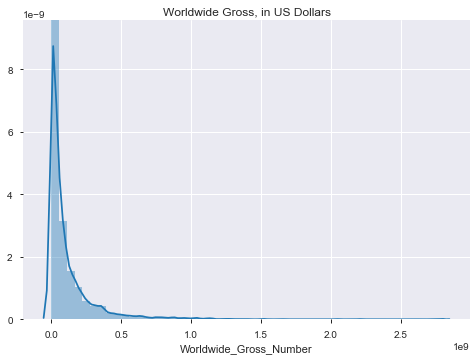

In [166]:
sns.distplot(target)
plt.title('Worldwide Gross, in US Dollars')

Text(0.5, 1.0, 'Worldwide Gross, in log-dollars')

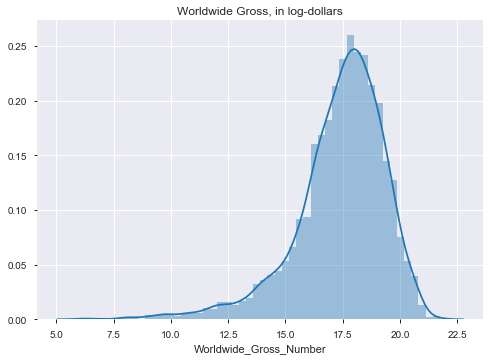

In [167]:
sns.distplot(y_log)
plt.title('Worldwide Gross, in log-dollars')

In [168]:
# Train/Validate/Test split by year
train = box_office[box_office['Release_dt'].dt.year < 2009]
val = box_office[(box_office['Release_dt'].dt.year < 2014) & (box_office['Release_dt'].dt.year >= 2009)]
test = box_office[box_office['Release_dt'].dt.year >= 2014]

In [169]:
train.shape

(2354, 29)

In [170]:
val.shape

(792, 29)

In [171]:
test.shape

(766, 29)

In [174]:
2354 + 792 + 766
# My train/validate/test split appears to have worked!

3912